# Stimulus intensity over time

Mean intensity over frame and intensity in RF center.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

# Connect to hmov schema

In [3]:
run -im djd.main -- --dbname=dj_hmov --r

For remote access to work, make sure to first open an SSH tunnel with MySQL
port forwarding. Run the `djdtunnel` script in a separate terminal, with
optional `--user` argument if your local and remote user names differ.
Or, open the tunnel manually with:
  ssh -NL 3306:huxley.neuro.bzm:3306 -p 1021 USERNAME@tunnel.bio.lmu.de
Connecting execute@localhost:3306
Connected to database 'dj_hmov' as 'execute@10.153.172.3'
For remote file access to work, make sure to first mount the filesystem at tunnel.bio.lmu.de:1021 via SSHFS with `hux -r`


In [4]:
from djd import hmov_models
from djd import hmov_unit

# Unit with ON center

In [5]:
key = {'m': 'Ntsr1Cre_2020_0002', 's': 6, 'e': 6, 'u': 15, 'spl_paramset': 8}

	Eye() is empty for key  {'m': 'Ntsr1Cre_2020_0002', 's': 6, 'e': 6, 'u': 15, 'spl_paramset': 8}
	Data object loaded without eye attributes.


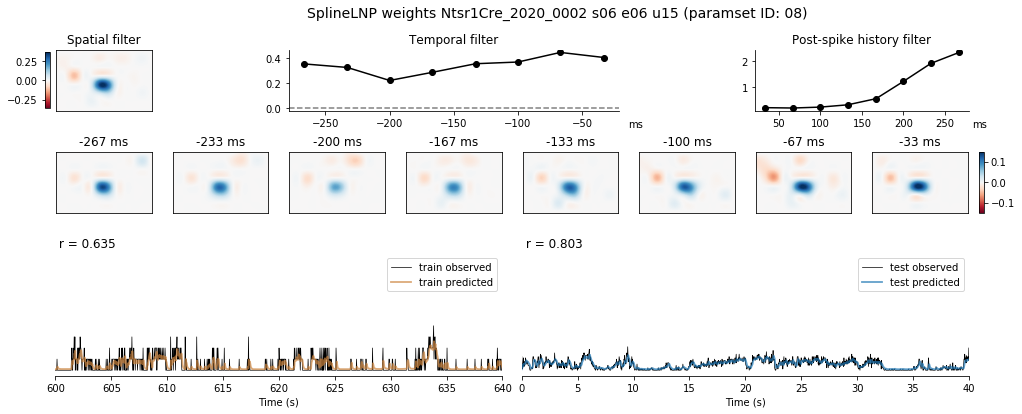

In [6]:
fig, ax = hmov_models.plot_RF(key)

Estimated STA after subtracting stimulus mean:

In [7]:
STA = (HmovUnit() & key).fetch1('hmu_sta_corrected')

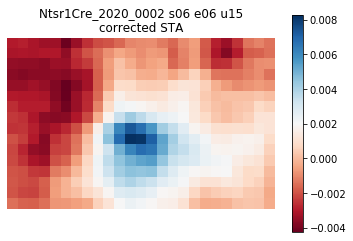

In [8]:
title=(('{:s} s{:02d} e{:02d} u{:02d}\ncorrected STA')
                   .format(key['m'], key['s'], key['e'], key['u']))
            
fig, ax = plt.subplots(1,1)
im = ax.imshow(STA, cmap='RdBu')
ax.axes.set_axis_off()
ax.set_title(title)
fig.colorbar(im)

Get RF center:

In [9]:
c1, c2 = np.where(STA==np.max(STA))

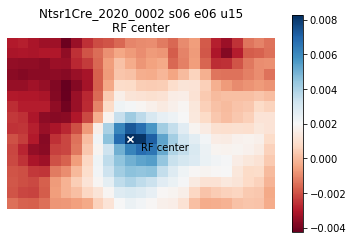

In [10]:
title=(('{:s} s{:02d} e{:02d} u{:02d}\nRF center')
                   .format(key['m'], key['s'], key['e'], key['u']))
            
fig, ax = plt.subplots(1,1)
ax.scatter(x=c2, y=c1, c='white', marker='x')
ax.text(c2+1,c1+1, 'RF center')
im = ax.imshow(STA, cmap='RdBu')
ax.axes.set_axis_off()
ax.set_title(title)
fig.colorbar(im)

Load data

In [11]:
data = hmov_unit._get_data(key)

	Eye() is empty for key  {'m': 'Ntsr1Cre_2020_0002', 's': 6, 'e': 6, 'u': 15, 'spl_paramset': 8}
	Data object loaded without eye attributes.


Get test response:

In [12]:
y = data.responses['test_mean']

Get predictions:

In [13]:
yhat = (SplineLNP()&key).fetch1('spl_pred_test_mean')

Get stimulus:

In [14]:
X = data.stimulus['test']
X_mean = np.mean(np.mean(X, axis=1), axis=1)

Get stimulus at RF center:

In [15]:
X_rf_center = np.squeeze(X[:,c1,c2])

Plot:

In [16]:
tv = np.linspace(1,40,X_mean.shape[0])

Text(0.5, 1.05, 'Ntsr1Cre_2020_0002 s06 e06 u15')

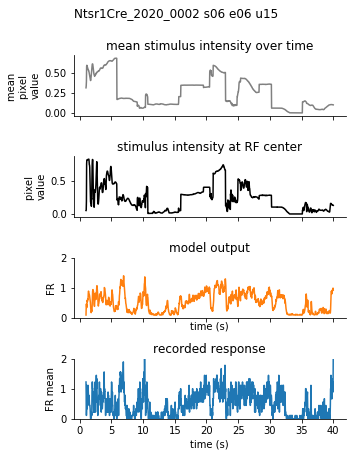

In [17]:
fig, axs = plt.subplots(4,1, figsize=(5,6), sharex=True)

axs[0].plot(tv, X_mean, 'gray')
axs[0].set_ylabel('mean \npixel \nvalue')
axs[0].set_title('mean stimulus intensity over time')

axs[1].plot(tv, X_rf_center, 'k')
axs[1].set_ylabel('pixel \nvalue')
axs[1].set_title('stimulus intensity at RF center')

axs[2].plot(tv, yhat, 'tab:orange')
axs[2].set_ylabel('FR')
axs[2].set_xlabel('time (s)')
axs[2].set_ylim([0,2])
axs[2].set_title('model output')

axs[3].plot(tv, y, 'tab:blue')
axs[3].set_ylabel('FR mean')
axs[3].set_xlabel('time (s)')
axs[3].set_ylim([0,2])
axs[3].set_title('recorded response')

sns.despine()
fig.tight_layout()
fig.suptitle('{:s} s{:02d} e{:02d} u{:02d}'.format(key['m'], key['s'], key['e'], key['u']), y=1.05)

#fig.savefig('./plots/{:s}_s{:02d}_e{:02d}_u{:02d}_.png'.format(parentkey['m'], parentkey['s'], parentkey['e'], parentkey['u']), dpi=150, bbox_inches='tight')

# Unit with OFF center

In [18]:
key = {'m': 'Ntsr1Cre_2020_0002', 's': 3, 'e': 6, 'u': 3, 'spl_paramset': 8}

	Eye() is empty for key  {'m': 'Ntsr1Cre_2020_0002', 's': 3, 'e': 6, 'u': 3, 'spl_paramset': 8}
	Data object loaded without eye attributes.


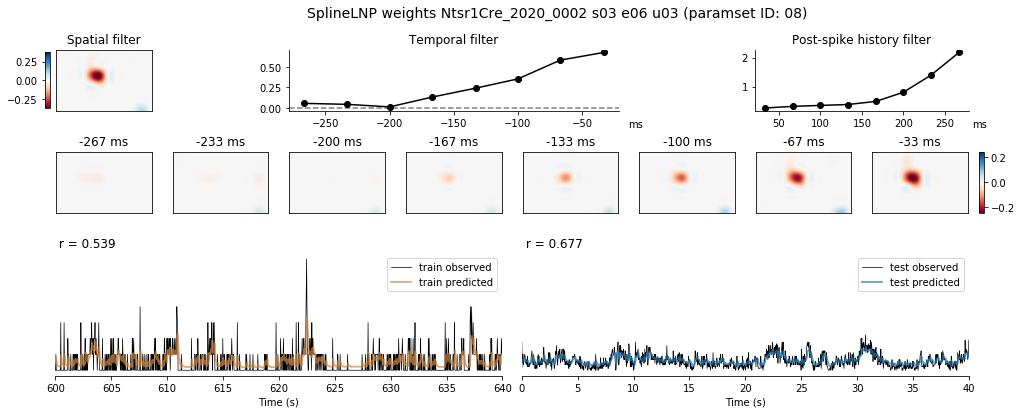

In [19]:
fig, ax = hmov_models.plot_RF(key)

Estimated STA after subtracting stimulus mean:

In [20]:
STA = (HmovUnit() & key).fetch1('hmu_sta_corrected')

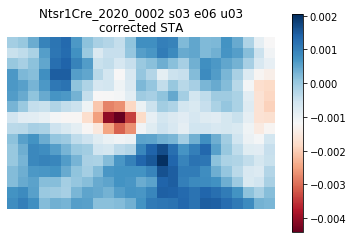

In [21]:
title=(('{:s} s{:02d} e{:02d} u{:02d}\ncorrected STA')
                   .format(key['m'], key['s'], key['e'], key['u']))
            
fig, ax = plt.subplots(1,1)
im = ax.imshow(STA, cmap='RdBu')
ax.axes.set_axis_off()
ax.set_title(title)
fig.colorbar(im)

Get RF center

In [22]:
c1, c2 = np.where(STA==np.min(STA))

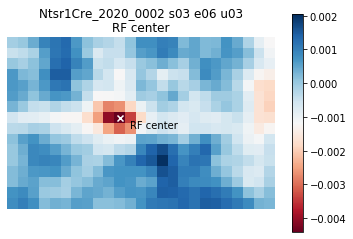

In [23]:
title=(('{:s} s{:02d} e{:02d} u{:02d}\nRF center')
                   .format(key['m'], key['s'], key['e'], key['u']))
            
fig, ax = plt.subplots(1,1)
ax.scatter(x=c2, y=c1, c='white', marker='x')
ax.text(c2+1,c1+1, 'RF center')
im = ax.imshow(STA, cmap='RdBu')
ax.axes.set_axis_off()
ax.set_title(title)
fig.colorbar(im)

Load data

In [24]:
data = hmov_unit._get_data(key)

	Eye() is empty for key  {'m': 'Ntsr1Cre_2020_0002', 's': 3, 'e': 6, 'u': 3, 'spl_paramset': 8}
	Data object loaded without eye attributes.


Get test response:

In [25]:
y = data.responses['test_mean']

Get predictions:

In [26]:
yhat = (SplineLNP()&key).fetch1('spl_pred_test_mean')

Get stimulus:

In [27]:
X = data.stimulus['test']
X_mean = np.mean(np.mean(X, axis=1), axis=1)

Get stimulus at RF center:

In [28]:
X_rf_center = np.squeeze(X[:,c1,c2])

Plot:

In [29]:
tv = np.linspace(1,40,X_mean.shape[0])

Text(0.5, 1.05, 'Ntsr1Cre_2020_0002 s03 e06 u03')

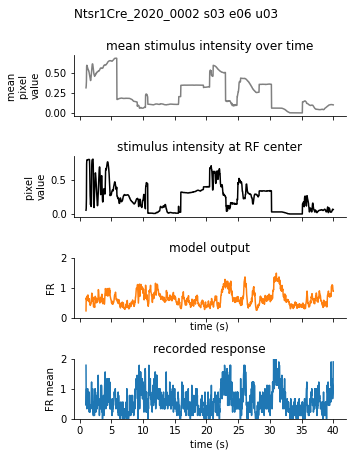

In [30]:
fig, axs = plt.subplots(4,1, figsize=(5,6), sharex=True)

axs[0].plot(tv, X_mean, 'gray')
axs[0].set_ylabel('mean \npixel \nvalue')
axs[0].set_title('mean stimulus intensity over time')

axs[1].plot(tv, X_rf_center, 'k')
axs[1].set_ylabel('pixel \nvalue')
axs[1].set_title('stimulus intensity at RF center')

axs[2].plot(tv, yhat, 'tab:orange')
axs[2].set_ylabel('FR')
axs[2].set_xlabel('time (s)')
axs[2].set_ylim([0,2])
axs[2].set_title('model output')

axs[3].plot(tv, y, 'tab:blue')
axs[3].set_ylabel('FR mean')
axs[3].set_xlabel('time (s)')
axs[3].set_ylim([0,2])
axs[3].set_title('recorded response')

sns.despine()
fig.tight_layout()
fig.suptitle('{:s} s{:02d} e{:02d} u{:02d}'.format(key['m'], key['s'], key['e'], key['u']), y=1.05)

#fig.savefig('./plots/{:s}_s{:02d}_e{:02d}_u{:02d}_.png'.format(parentkey['m'], parentkey['s'], parentkey['e'], parentkey['u']), dpi=150, bbox_inches='tight')

Unit reacts to offsets